In [33]:
from fastai.vision import *
from fastai.widgets import *
np.random.seed(42)

### Load Data & Preview

In [34]:
path = 'data/towers/'
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [35]:
data.classes

['cn_tower', 'skytree', 'space_needle']

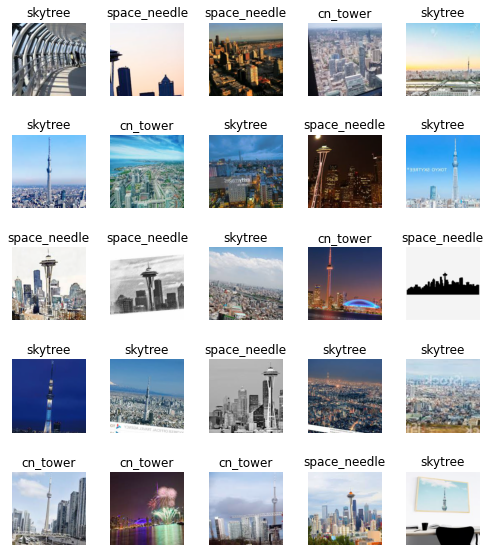

In [36]:
data.show_batch(rows=5, figsize=(7,8))

In [37]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cn_tower', 'skytree', 'space_needle'], 3, 773, 193)

### Train Model

In [38]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [39]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.595199,0.587324,0.217617,00:03
1,1.154938,0.507891,0.181347,00:03
2,0.901827,0.454302,0.145078,00:03
3,0.774743,0.434261,0.134715,00:03


In [40]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

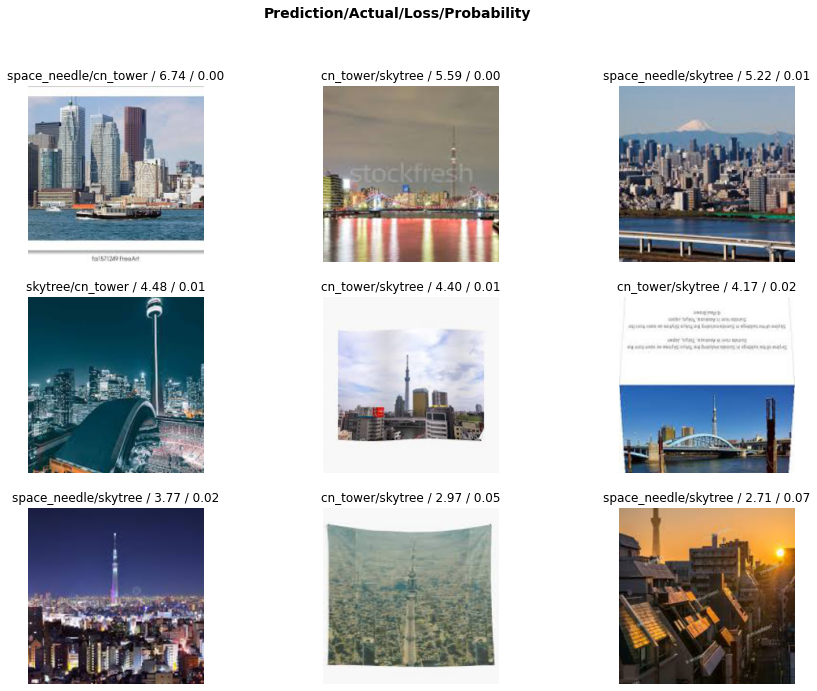

In [41]:
interp.plot_top_losses(9, figsize=(15,11))

### Prune Data

In [42]:
tfms = get_transforms(do_flip=False)
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(tfms, size=224)     
                   .databunch()).normalize(imagenet_stats)

In [43]:
learn = cnn_learner(db, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(2)

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=imgs=50)
ImageCleaner(ds, idxs, path)

In [44]:
# Refreshed databunch excluding problematic examples
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                   .split_by_rand_pct()
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch())

In [45]:
learn = cnn_learner(db, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.538954,0.744651,0.240437,00:03
1,1.117181,0.541291,0.207650,00:03
2,0.891089,0.436291,0.158470,00:03
3,0.769464,0.373906,0.153005,00:03


In [46]:
learn.export()